## Chapter 4. 신경망 학습

- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수에 대해 알아보자!

#### Machine Learning과 학습
- 기계학습에서는 사람의 개입을 최소화하고 수집한 '데이터'로부터 '패턴'을 찾으려 시도한다.
- 따라서, 데이터로부터 '특징(feature)'을 추출하고 그 특징의 패턴을 기계학습 기술로 학습시키게 된다.
- BUT! 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당하더라도, 데이터에 대해 '중요한 특징'이 무엇인지 생각하고, 구성하는 것은 '사람'의 몫이다.

#### Neural Network와 학습
- 신경망은 이미지를 '있는 그대로' 학습하고, 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습한다!
- 따라서, 딥러닝을 종단간 기계학습(end-to-end machine learning)이라고도 하는데, 이는 처음부터 끝까지, 즉, 데이터(입력)에서 결과(출력)까지 사람의 개입 없이 얻어낸다는 뜻을 가지고 있다.

### 4.2 손실함수
- 손실 함수(loss function): 신경망 학습에서 사용하는 지표
- 일반적으로 평균 제곱 오차(MSE)와 교차 엔트로피 오차를 사용한다.
- 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못'하느냐를 나타낸다.
- 즉, 손실 함수 값에 마이너스를 곱하면 '얼마나 좋은지'에 대한 지표로 사용할 수 있다.

#### 4.2.1 평균 제곱 오차(Mean Squared Error, MSE)

$ E = {1 \over 2} \sum\limits_k(y_k - t_k)^2 $

- $y_k$: 신경망의 출력값(예측값)
- $t_k$: 정답 레이블(실제 정답값)
- $k$: 데이터의 수(data point 수)

In [2]:
import numpy as np

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2) # y, t는 넘파이 배열

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 2

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # '2'일 확률이 가장 높다고 추정
print(mean_squared_error(np.array(y), np.array(t))) # 오차가 더 작은 쪽이 정답에 더 가까움!

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # '7'일 확률이 가장 높다고 추정
print(mean_squared_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


#### 4.2.2 교차 엔트로피 오차(Cross Entropy Error, CEE)

$ E = - \sum\limits_k t_k \log y_k $

- $\log$: 밑이 $e$인 자연로그($log_e$)
- $y_k$: 신경망의 출력값(예측값)
- $t_k$: 실제 정답값
- 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 (one-hot encoding)이기 때문에, 정답에 해당하는 인덱스의 신경망 출력값에 대해 교차 엔트로피 오차를 계산한 값이 된다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

C:\Users\minji\AppData\Local\Temp/ipykernel_17728/3250564785.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


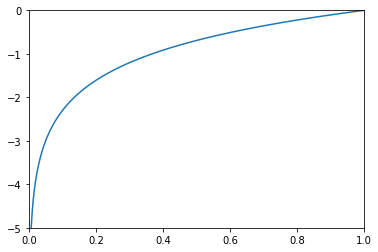

In [7]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.xlim(0.0, 1.0)
plt.ylim(-5, 0)
plt.show()

- 정답일 때의 출력이(즉, $y_k$) 1일수록 (softmax 함수의 출력값=1) 오차는 작아진다.
- 정답일 때의 출력값이 작아질수록(0에 가까워질수록) 오차는 커진다.

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) # y=0이면 log 0은 마이너스 무한대가 되어버리므로, 아주 작은 delta 값을 더해서 0이 되지 않도록 한다.

In [9]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 2

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # '2'일 확률이 가장 높다고 추정
print(cross_entropy_error(np.array(y), np.array(t))) # 오차가 더 작은 쪽이 정답에 더 가까움!
# 정답 인덱스에 대한 출력값 = 0.6
# 즉, -2*log0.6

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # '7'일 확률이 가장 높다고 추정
print(cross_entropy_error(np.array(y2), np.array(t)))
# 정답 인덱스에 대한 출력값 = 0.1
# 즉, -2*log0.1

0.510825457099338
2.302584092994546
